# Движење во матрица

## Референци

- [Растојание Чебишев](https://en.wikipedia.org/wiki/Chebyshev_distance)
- [Растојание Менхетен](https://en.wikipedia.org/wiki/Taxicab_geometry)
- [Растојание Евклид](https://en.wikipedia.org/wiki/Euclidean_distance)

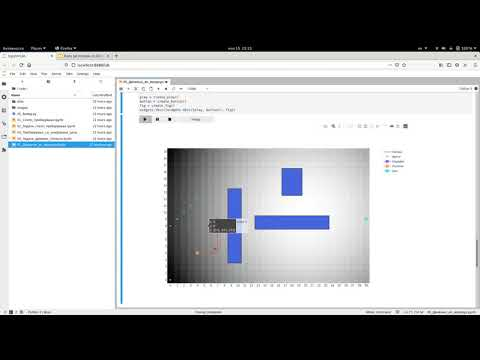

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('O5hDX-pHDag')

In [2]:
from collections import deque
import heapq
from plotly import graph_objects as go
import ipywidgets as widgets

In [3]:
def breadth_first_search(starting_vertex, goal_vertex):
    """
    Returns the path from starting_vertex to goal_vertex using the breadth first search algorithm.
    """
    visited = {starting_vertex}
    queue = deque([[starting_vertex]])
    while queue:
        vertex_list = queue.popleft()
        vertex_to_expand = vertex_list[-1]
        
        frontier = list(set([q[-1] for q in queue]))
        yield frontier, vertex_list, vertex_to_expand
        
        for neighbour in expand_state(vertex_to_expand):
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(vertex_list + [neighbour])
    yield [], [], goal_vertex

In [4]:
def depth_first_search(starting_vertex, goal_vertex):
    """
    Returns the path from starting_vertex to goal_vertex using the depth first search algorithm.
    """
    visited = {starting_vertex}
    queue = deque([[starting_vertex]])
    while queue:
        vertex_list = queue.popleft()
        vertex_to_expand = vertex_list[-1]
        
        frontier = list(set([q[-1] for q in queue]))
        yield frontier, vertex_list, vertex_to_expand
        
        for neighbour in expand_state(vertex_to_expand):
            if neighbour not in visited:
                visited.add(neighbour)
                queue.appendleft(vertex_list + [neighbour])
    yield [], [], goal_vertex

In [5]:
def uniform_cost_search(starting_vertex, goal_vertex):
    """
    Returns the path from starting_vertex to goal_vertex using the uniform-cost search algorithm.
    """
    expanded = set()
    queue = [(0, [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight, vertex_list = heapq.heappop(queue)
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand in expanded:
            continue

        frontier = list(set([q[-1][-1] for q in queue]))
        yield frontier, vertex_list, vertex_to_expand
        
        for neighbour in expand_state(vertex_to_expand):
            new_weight = get_weight(vertex_to_expand, neighbour)
            if neighbour not in expanded:
                heapq.heappush(queue, (weight + new_weight, vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)
    yield [], [], goal_vertex

In [6]:
def gready_search(starting_vertex, goal_vertex):
    """
    Returns the path from starting_vertex to goal_vertex using the gready search algorithm.
    """
    expanded = set()
    queue = [(0, [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight, vertex_list = heapq.heappop(queue)
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand in expanded:
            continue

        frontier = list(set([q[-1][-1] for q in queue]))
        yield frontier, vertex_list, vertex_to_expand
        
        for neighbour in expand_state(vertex_to_expand):
            heuristic = manhattan_distance(neighbour, goal_vertex)
            if neighbour not in expanded:
                heapq.heappush(queue, (heuristic, vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)
    yield [], [], goal_vertex

In [7]:
def a_star_search(starting_vertex, goal_vertex, alpha):
    """
    Returns the path from starting_vertex to goal_vertex using the a* search algorithm.
    """
    expanded = set()
    queue = [((0, 0), [starting_vertex])]
    heapq.heapify(queue)
    while queue:
        weight_tupple, vertex_list = heapq.heappop(queue)
        current_a_star_weight, current_path_weight = weight_tupple
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand in expanded:
            continue

        frontier = list(set([q[-1][-1] for q in queue]))
        yield frontier, vertex_list, vertex_to_expand
        
        for neighbour in expand_state(vertex_to_expand):
            if neighbour not in expanded:
                new_weight = get_weight(vertex_to_expand, neighbour)
                heuristic = manhattan_distance(neighbour, goal_vertex)
                path_weight = current_path_weight + new_weight
                a_star_weight = path_weight + alpha * heuristic
                heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)
    yield [], [], goal_vertex

In [8]:
def manhattan_distance(state_1, state_2):
    return abs(state_1[0] - state_2[0]) + abs(state_1[1] - state_2[1])

In [9]:
def get_weight(source_state, destination_state):
    source_x, source_y = source_state
    destination_x, destination_y = destination_state
    weight = MOUNTAIN[destination_y][destination_x][0] - MOUNTAIN[source_y][source_x][0]
    return 1 + max(weight, 0)

In [14]:
def expand_state(state):
    next_states = []
    x, y = state
    
    def is_valid(square):
        x, y = square
        if not(0 <= x < COLUMNS) or not(0 <= y < ROWS):
            return False
        for wall in WALLS:
            if wall['x'][0] < x < wall['x'][1] and wall['y'][0] < y < wall['y'][1]:
                return False
        return True
        
    neighbour_states = [
        (x+1, y), (x-1, y), (x, y+1), (x, y-1), 
        (x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)]
    for neighbour_state in neighbour_states:
        if is_valid(neighbour_state):
            next_states.append(neighbour_state)
    
    return next_states

In [34]:
def update_fig(x):
    if button.disabled is True:
        return
    else:
        frontier, current_path, vertex_to_expand = next(simulation)
        if vertex_to_expand in GOAL:
            button.disabled = True
            play.disabled = True
            play.value = play.max
    path_x = [segment[0] for segment in current_path]
    path_y = [segment[1] for segment in current_path]
    frontier_x = [segment[0] for segment in frontier]
    frontier_y = [segment[1] for segment in frontier]
    with fig.batch_update():
        fig.data[1].x = path_x
        fig.data[1].y = path_y
        fig.data[2].x = frontier_x
        fig.data[2].y = frontier_y
        fig.data[3].x = [vertex_to_expand[0]]
        fig.data[3].y = [vertex_to_expand[1]]

def create_button():
    button = widgets.Button(description='Чекор')
    button.on_click(update_fig)
    return button

def create_play():
    play = widgets.Play(value=0, max=3000, interval=10, show_repeat=False)
    play.observe(update_fig, 'value')
    return play

def create_mountain():
    def f(x, y):
        return 1 - (x - 2 * COLUMNS // 3) ** 2 - (y - ROWS // 2) ** 2

    mountain = [[f(x, y) for x in range(COLUMNS)] for y in range(ROWS)]
    min_value = min(min(mountain))
    for y in range(ROWS):
        for x in range(COLUMNS):
            mountain[y][x] = [mountain[y][x] - min_value] * 3
    
    min_value = min(min(min(mountain)))
    max_value = max(max(max(mountain)))
    mountain_image = go.Image(z=mountain, zmin=[min_value]*4, zmax=[max_value]*4)
    return mountain, mountain_image

def create_fig():
    fig = go.FigureWidget()

    for wall in WALLS:
        fig.add_shape(
            type='rect', fillcolor='RoyalBlue', 
            x0=wall['x'][0], x1=wall['x'][1], 
            y0=wall['y'][0], y1=wall['y'][1])

    fig.add_trace(mountain_image)
    fig.add_scatter(mode='lines', name='Патека')
    fig.add_scatter(mode='markers', name='Фронт')
    fig.add_scatter(marker_symbol='x', marker_size=12, name='Нареден')
    fig.add_scatter(x =[START[0]], y=[START[1]], marker_symbol='x', marker_size=12, name='Почеток')
    x = [g[0] for g in GOAL]
    y = [g[1] for g in GOAL]
    fig.add_scatter(x=x, y=y, marker_symbol='x', marker_size=12, name='Цел', mode='markers')

    fig.update_xaxes(range=[-0.5, COLUMNS - 0.5], dtick=1)
    fig.update_yaxes(range=[-0.5, ROWS - 0.5], dtick=1)
    fig.update_layout(width=36*COLUMNS, height=36*ROWS)
    return fig

ROWS, COLUMNS = 20, 30
WALLS = [
    {'x': (12.5, 23.5), 'y': (7.5, 9.5)},
    {'x': (8.5, 10.5), 'y': (2.5, 13.5)},
    {'x': (16.5, 19.5), 'y': (12.5, 16.5)},
]
START = (4, 4)
GOAL = [(29, 9) , (20, 6), (14, 11)]
MOUNTAIN, mountain_image = create_mountain()
simulation = breadth_first_search(START, GOAL)

play = create_play()
button = create_button()
fig = create_fig()
widgets.VBox([widgets.HBox([play, button]), fig])

## Задачи за самостојна работа

1. Надградете ја симулацијата така што агентот ќе може да се движи и во косо, односно во сите 8 насоки.
1. Надградете ја симулацијата така што целта нема да биде единствена, туку ќе биде сочинета од повеќе различни полиња.
    1. Во еден случај агентот треба да стигне до само едно поле од целта.
    1. Во друг случај агентот треба да стигне до сите полиња од целта, во произволен редослед.
    1. Во трет случај агентот треба да стигне до сите полиња од целта, во редослед чија сума на должините на делниците би била најмала.
1. Испитајте ја разликата помеѓу евклидовото растојание и менхетен за функцијата за евристика.

### Решение

In [35]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('io5GkVwXnAE')